In [739]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [740]:
df = pd.read_csv("Data/apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252')
df

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/2100337387.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/apartments_for_rent_classified_100K.csv", sep=";", encoding='cp1252')


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   44138 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

Bedrooms some null-values, remove these

In [742]:
df = df[df["bedrooms"] > -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99368 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99368 non-null  int64  
 1   category       99368 non-null  object 
 2   title          99368 non-null  object 
 3   body           99368 non-null  object 
 4   amenities      83353 non-null  object 
 5   bathrooms      99306 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99368 non-null  object 
 8   fee            99368 non-null  object 
 9   has_photo      99368 non-null  object 
 10  pets_allowed   44091 non-null  object 
 11  price          99367 non-null  float64
 12  price_display  99367 non-null  object 
 13  price_type     99368 non-null  object 
 14  square_feet    99368 non-null  int64  
 15  address        7927 non-null   object 
 16  cityname       99066 non-null  object 
 17  state          99066 non-null  object 
 18  latitu

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/657761454.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

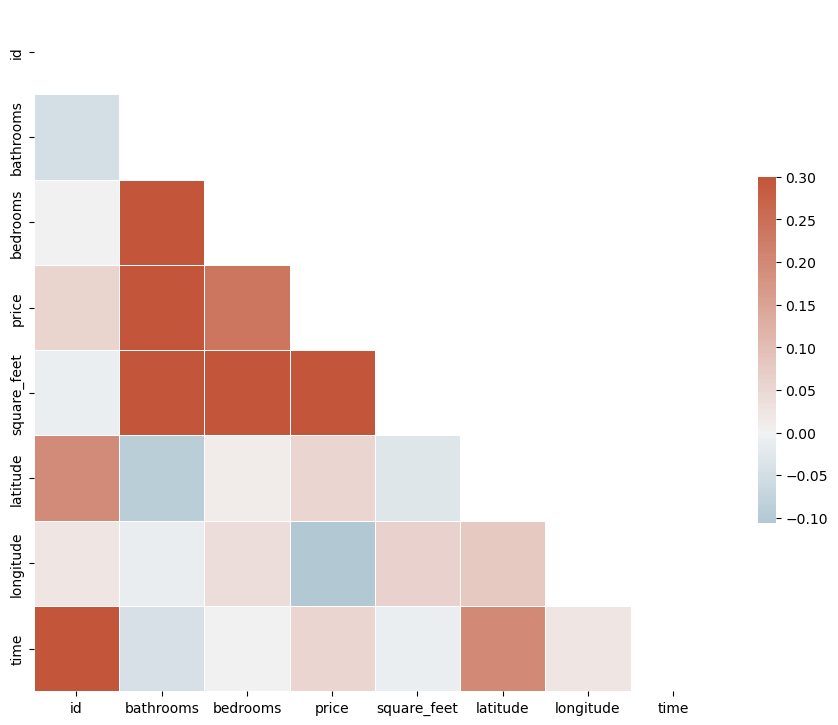

In [743]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

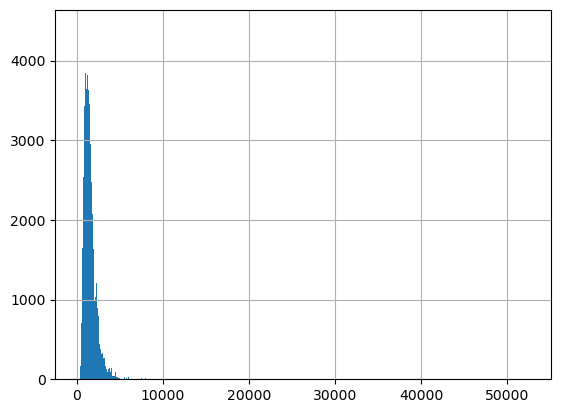

In [218]:
df["price"].hist(bins=1000)

In [219]:
df["has_photo"].value_counts()
df.groupby("has_photo")["price"].mean()

has_photo
No           1618.837571
Thumbnail    1462.725844
Yes          1551.831730
Name: price, dtype: float64

<AxesSubplot:>

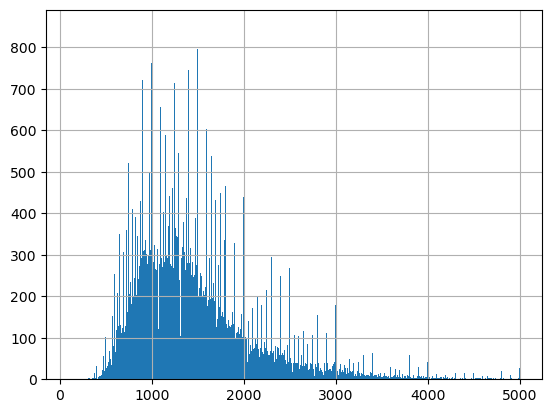

In [220]:
df[df["price"] > 5000].count()
df = df[df["price"] < 5000]
df["price"].hist(bins=1000)

In [221]:
df["category"].value_counts()

housing/rent/apartment            98808
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: category, dtype: int64

In [222]:
df["price_type"].value_counts()

Monthly    98867
Weekly         2
Name: price_type, dtype: int64

In [223]:
df["fee"].value_counts()

No     98674
Yes      195
Name: fee, dtype: int64

Remove "outlier" values

In [224]:
df = df[df["category"] == "housing/rent/apartment"]
df = df[df["price_type"] == "Monthly"]
df = df[df["fee"] == "No"]

In [225]:
df["year"] = df["time"].apply(lambda t: datetime.fromtimestamp(t).strftime('%Y'))
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,year
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,2019
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,2019
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,2019
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,2019
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770,2018
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750,2018
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670,2018


Keep only from RentDigs.com to keep data consistent

In [226]:
df["source"].value_counts()

RentDigs.com         90353
RentLingo             6845
ListedBuy              554
GoSection8             434
RealRentals            255
RENTCafé                41
Listanza                28
SpreadMyAd              21
RENTOCULAR              17
tenantcloud             17
RentFeeder              12
Home Rentals             8
Claz                     6
rentbits                 5
vFlyer                   5
Seattle Rentals          2
Real Estate Shows        1
Nest Seekers             1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: source, dtype: int64

In [227]:
df = df[df["source"] == "RentDigs.com"]
df["source"].value_counts()
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,year
6756,5668556637,housing/rent/apartment,Owner Pays All Utilities!,Newport News OWNER PAYS ALL UTILITIES!!! Quain...,"AC,Cable or Satellite,Patio/Deck,Wood Floors",1.0,1.0,USD,No,Thumbnail,...,Monthly,400,15910 Warwick Boulevard,Newport News,VA,37.1451,-76.5397,RentDigs.com,1577354122,2019
6758,5668556669,housing/rent/apartment,One-of-a-kind Enumclaw Apartment for rent!,Enumclaw Recently up-to-date and ready to rent...,"Cable or Satellite,Dishwasher,Parking,Storage,...",1.0,2.0,USD,No,Thumbnail,...,Monthly,850,2110 Wells St Apartment #1,Enumclaw,WA,47.2087,-121.8634,RentDigs.com,1577354125,2019
6860,5666447524,housing/rent/apartment,Wildhorse Ridge,"Denver showing available jan 7, 2020available ...","AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",1.0,1.0,USD,No,Thumbnail,...,Monthly,1098,21309 E 50th Avenue,Denver,CO,39.7789,-104.7545,RentDigs.com,1577185741,2019
6865,5666448089,housing/rent/apartment,Lawrence Landing,Indianapolis Enjoy waterfront living in a spac...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",1.5,2.0,USD,No,Thumbnail,...,Monthly,1047,6875 Faris Avenue,Indianapolis,IN,39.8373,-86.0562,RentDigs.com,1577185784,2019
6866,5666449065,housing/rent/apartment,Brand New Duplex,Harker Heights 2 Beds two Bathrooms w/ study S...,"AC,Cable or Satellite,Dishwasher,Internet Acce...",2.0,2.0,USD,No,Thumbnail,...,Monthly,1150,1521 Aztec Trace,Harker Heights,TX,31.0283,-97.6473,RentDigs.com,1577185849,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770,2018
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750,2018
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670,2018


### Decision Tree

In [647]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [648]:
df_dt = df[df["state"] == "CA"]
df_dt

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,year
6966,5662495592,housing/rent/apartment,"18th Floor, Giant Loft w/ Amazing Mountain Vie...",San Diego Amazing 18th story open concept loft...,"AC,Cable or Satellite,Dishwasher,Gated,Gym,Hot...",1.0,1.0,USD,No,Thumbnail,...,Monthly,1000,1080 Park Boulevard Unit 1806,San Diego,CA,32.7211,-117.1643,RentDigs.com,1576836887,2019
6967,5661066073,housing/rent/apartment,Elan Park Place Apartment Homes,Carlsbad Coastal Living At It's Best!Elan Park...,"Cable or Satellite,Dishwasher,Fireplace,Gated,...",2.5,2.0,USD,No,Thumbnail,...,Monthly,988,2605 Jefferson St,Carlsbad,CA,33.1481,-117.3055,RentDigs.com,1576748558,2019
7067,5654896496,housing/rent/apartment,Studio Apartment,"Los Angeles Granite, Refrigerator, stove, air ...","AC,Parking,Refrigerator",1.0,0.0,USD,No,Thumbnail,...,Monthly,453,11931 Jefferson Boulevard,Los Angeles,CA,33.9966,-118.4305,RentDigs.com,1576406194,2019
7085,5652839935,housing/rent/apartment,Significantly Renovated Two BR/Two BA Apartment,San Francisco Beautifully Updated two Beds/2 B...,"Dishwasher,Garbage Disposal,Patio/Deck,Refrige...",2.0,2.0,USD,No,Thumbnail,...,Monthly,1000,767 Y Tehama St,San Francisco,CA,37.7740,-122.4104,RentDigs.com,1576270916,2019
7087,5653496708,housing/rent/apartment,Duplex,"Sacramento two beds,garage, backyard , near Ci...","AC,Cable or Satellite,Internet Access,Parking,...",1.5,2.0,USD,No,No,...,Monthly,1000,2084 20th Avenue,Sacramento,CA,38.5128,-121.4962,RentDigs.com,1576317876,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99409,5122000534,housing/rent/apartment,One BR Apartment - a newly acquired community ...,Now under new professional ownership. Nestled ...,"Parking,Pool",1.0,1.0,USD,No,Yes,...,Monthly,690,NaN,Sunnyvale,CA,37.3761,-122.0219,RentDigs.com,1544249150,2018
99428,5121248854,housing/rent/apartment,One BR - Solis - 206 - Perfect for couples loo...,Our 1 Beds. offer a private bedroom and spacio...,"AC,Patio/Deck,Refrigerator,TV",1.0,1.0,USD,No,Yes,...,Monthly,334,NaN,San Diego,CA,32.7649,-117.1996,RentDigs.com,1544187321,2018
99433,5121241687,housing/rent/apartment,Two BR Two BA in Beautiful Bay Park!,"2nd floor unit with enticing hard wood floors,...","AC,Cable or Satellite,Dishwasher,Fireplace,Gat...",2.0,2.0,USD,No,Yes,...,Monthly,948,NaN,San Diego,CA,32.7649,-117.1996,RentDigs.com,1544187088,2018
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018


In [649]:
KEEP_COLS = ["price", "bathrooms", "bedrooms"]
df_dt = df_dt[KEEP_COLS]
df_dt

,price,bathrooms,bedrooms
6966,2380.0,1.0,1.0
6967,2445.0,2.5,2.0
7067,1650.0,1.0,0.0
7085,2800.0,2.0,2.0
7087,1000.0,1.5,2.0
...,...,...,...
99409,2395.0,1.0,1.0
99428,1500.0,1.0,1.0
99433,2050.0,2.0,2.0
99489,1325.0,1.0,1.0


<AxesSubplot:>

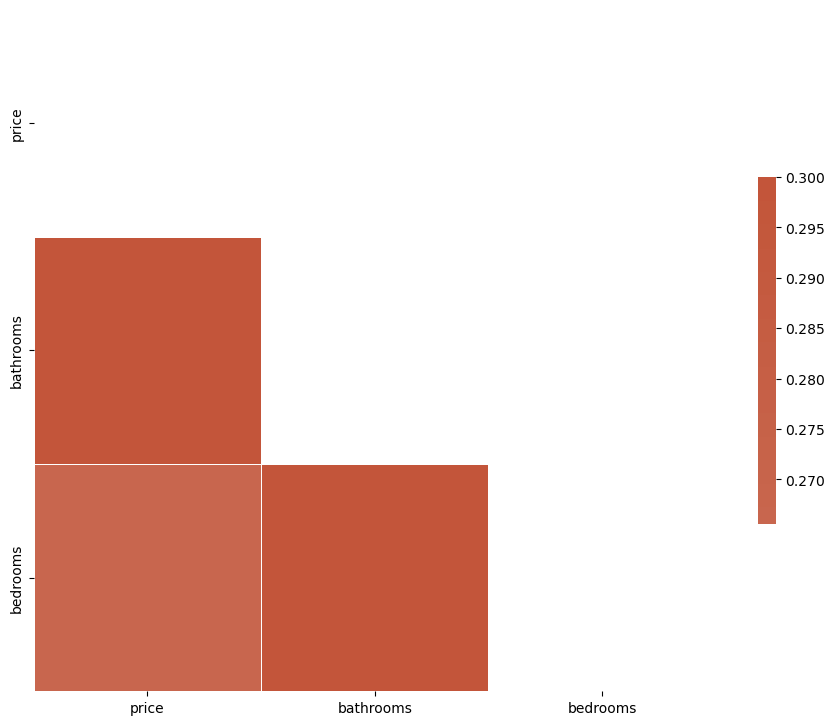

In [650]:
import seaborn as sns

# Compute the correlation matrix
corr = df_dt.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [651]:
def get_label(price): 
    if price < 3500: 
        return 0
    else:
        return 1

In [652]:
df_dt["label"] = df_dt["price"].apply(lambda p: get_label(p))
df_dt.groupby("label").count()

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/1890825687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt["label"] = df_dt["price"].apply(lambda p: get_label(p))


,price,bathrooms,bedrooms
label,,,
0,8290,8290,8290
1,856,856,856


In [653]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 6966 to 99491
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      9146 non-null   float64
 1   bathrooms  9146 non-null   float64
 2   bedrooms   9146 non-null   float64
 3   label      9146 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 357.3 KB


Bathrooms some NaN-values, remove

In [654]:
df_dt = df_dt[df_dt["bathrooms"] > -1]

Label encode categories

In [655]:
# label_encoder = preprocessing.LabelEncoder() 
# df_dt['state'] = label_encoder.fit_transform(df_dt['state']) 

Split into train/test-set

In [656]:
df_dt = df_dt.drop(columns=["price"])
X = df_dt.iloc[:, :-1].values
y = df_dt.iloc[:, -1].values

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Train model

In [678]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

Predict new result

In [679]:
y_pred = classifier.predict(X_test)

In [680]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1656    8]
 [ 159    7]]


0.9087431693989071

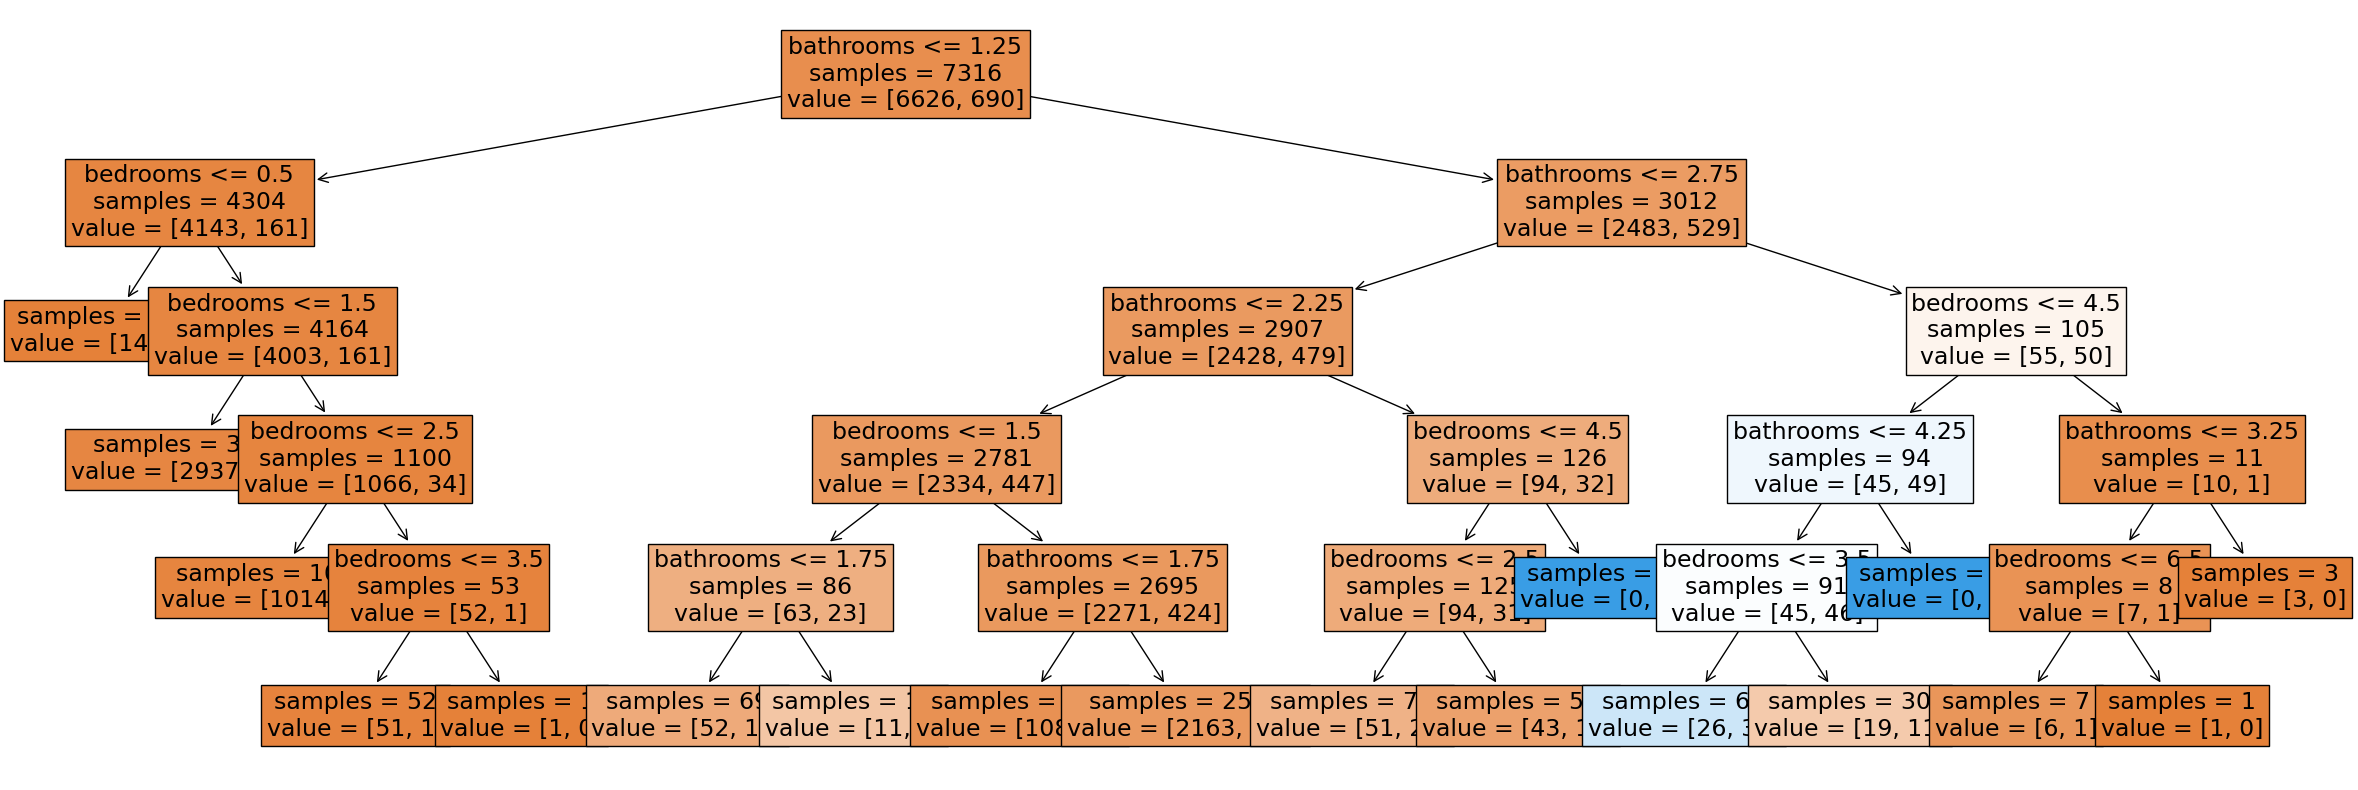

In [681]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names = KEEP_COLS[1:],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


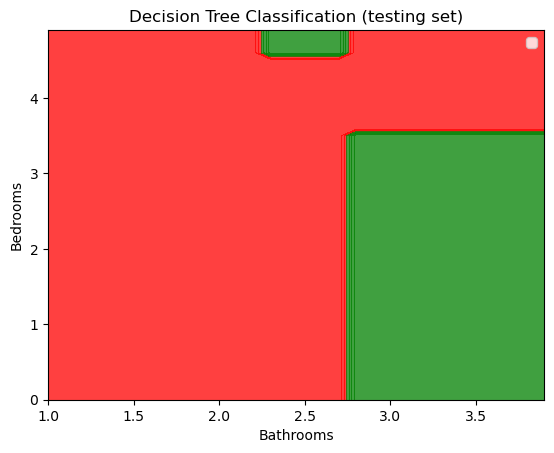

In [682]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min(), stop = X_test[:, 0].max(), step = 0.1),
                     np.arange(start = X_test[:, 1].min(), stop = X_test[:, 1].max(), step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classification (testing set)')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.legend()
plt.show()

### Linear Regression

In [745]:
from sklearn.model_selection import train_test_split
KEEP_COLS = ["price", "square_feet"]
df_lr = df[df["state"] == "CA"]
X = df_lr[KEEP_COLS].drop('price',axis=1) # Independet variable
y = df_lr['price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [746]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter: Intercept, bedrooms, square_feet
theta = [lin_reg.intercept_]+list(lin_reg.coef_)
theta

[337.2827818322794, 2.2932061314335432]

In [770]:
# sklearn regression module
y_pred = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

# R_square
R_sq = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) is: ',mse)
print('R squared :',R_sq)

The Mean Square Error(MSE) is:  2810589.5287404926
R squared : 0.27439689448627613


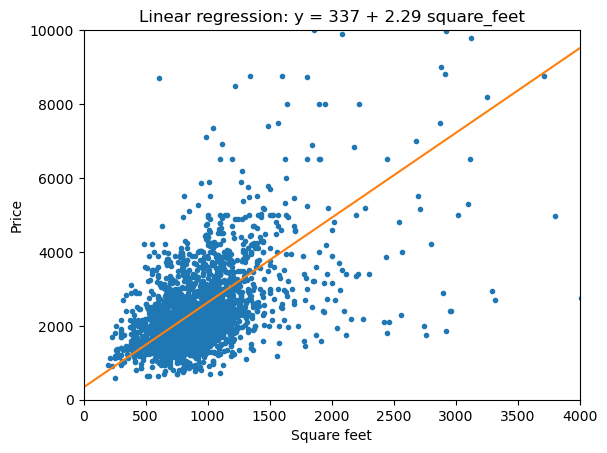

In [785]:
# plot prediction and actual data
plt.plot(X_test, y_test, '.')

# plot a line, a perfect predict would all fall on this line
x = np.linspace(0, 10000, 10000)
plt.plot(x, theta[0]+theta[1]*x)
plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.ylabel("Price")
plt.xlabel("Square feet")
plt.title(f"Linear regression: y = {int(theta[0])} + {round(theta[1], 2)} square_feet")
plt.show()

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_78877/2378949565.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


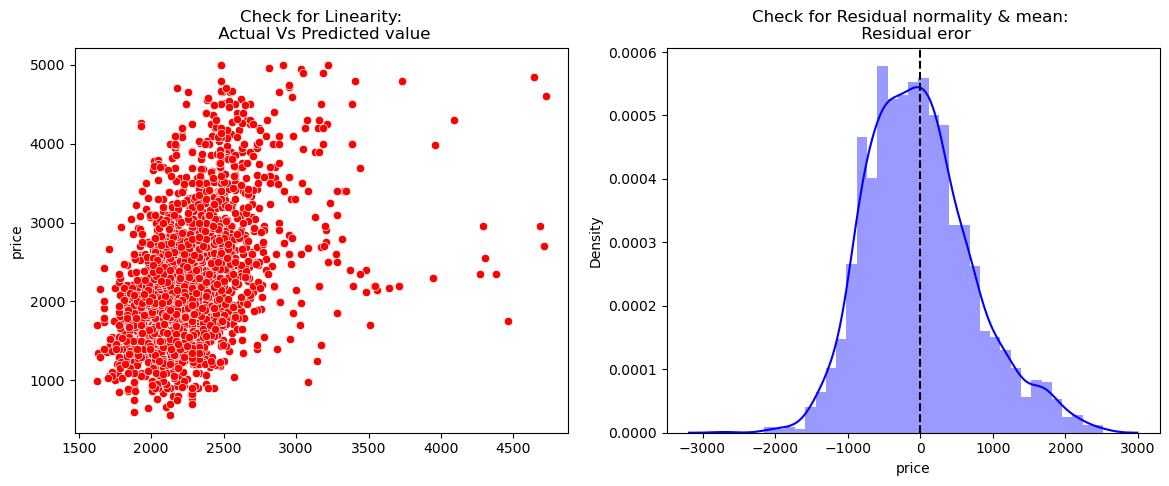

In [738]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y=y_test,x=y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

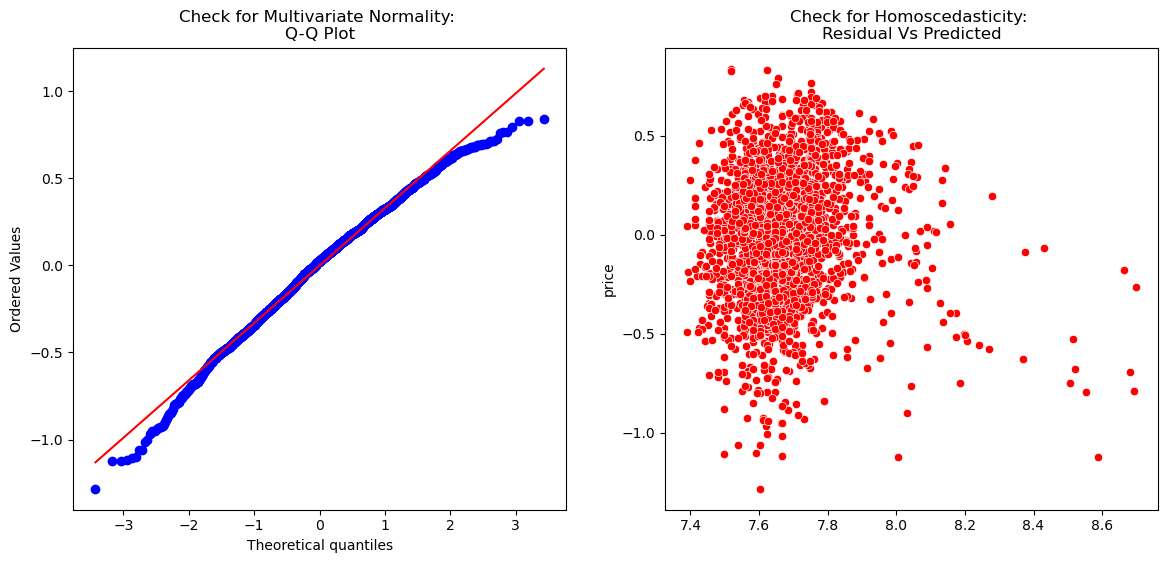

In [734]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');